In [22]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


In [3]:

# Ruta del archivo CSV
ruta_archivo = "../data/raw/airpollution.csv"

# Leer el archivo CSV con pandas
df = pd.read_csv(ruta_archivo)


print(df.head())

              Country              City  AQI Value AQI Category  CO AQI Value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
0             Good     

## Primer acercamiento a los datos


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


Conteo de países registrados: 

In [6]:
df['Country'].nunique()

175

## Datos referidos a Argentina

In [8]:
df[df['Country']=='Argentina']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
297,Argentina,Chacabuco,17,Good,0,Good,17,Good,1,Good,17,Good
325,Argentina,Corrientes,13,Good,1,Good,12,Good,0,Good,13,Good
750,Argentina,Mercedes,14,Good,1,Good,14,Good,0,Good,3,Good
1030,Argentina,Formosa,32,Good,0,Good,13,Good,0,Good,32,Good
1464,Argentina,Necochea,23,Good,0,Good,23,Good,0,Good,17,Good
...,...,...,...,...,...,...,...,...,...,...,...,...
21648,Argentina,Lujan,22,Good,0,Good,14,Good,3,Good,22,Good
21810,Argentina,Tandil,23,Good,0,Good,23,Good,0,Good,23,Good
22209,Argentina,Campana,54,Moderate,1,Good,23,Good,4,Good,54,Moderate
23339,Argentina,La Rioja,11,Good,0,Good,11,Good,0,Good,5,Good


In [9]:
df[df['City']=='Tucuman']

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
8020,Argentina,Tucuman,66,Moderate,1,Good,14,Good,5,Good,66,Moderate


Creación de un nuevo df con información sobre Argentina. Gráficos promedio de los valores en el país. 

        Country        City  AQI Value AQI Category  CO AQI Value  \
297   Argentina   Chacabuco         17         Good             0   
325   Argentina  Corrientes         13         Good             1   
750   Argentina    Mercedes         14         Good             1   
1030  Argentina     Formosa         32         Good             0   
1464  Argentina    Necochea         23         Good             0   

     CO AQI Category  Ozone AQI Value Ozone AQI Category  NO2 AQI Value  \
297             Good               17               Good              1   
325             Good               12               Good              0   
750             Good               14               Good              0   
1030            Good               13               Good              0   
1464            Good               23               Good              0   

     NO2 AQI Category  PM2.5 AQI Value PM2.5 AQI Category  
297              Good               17               Good  
325           

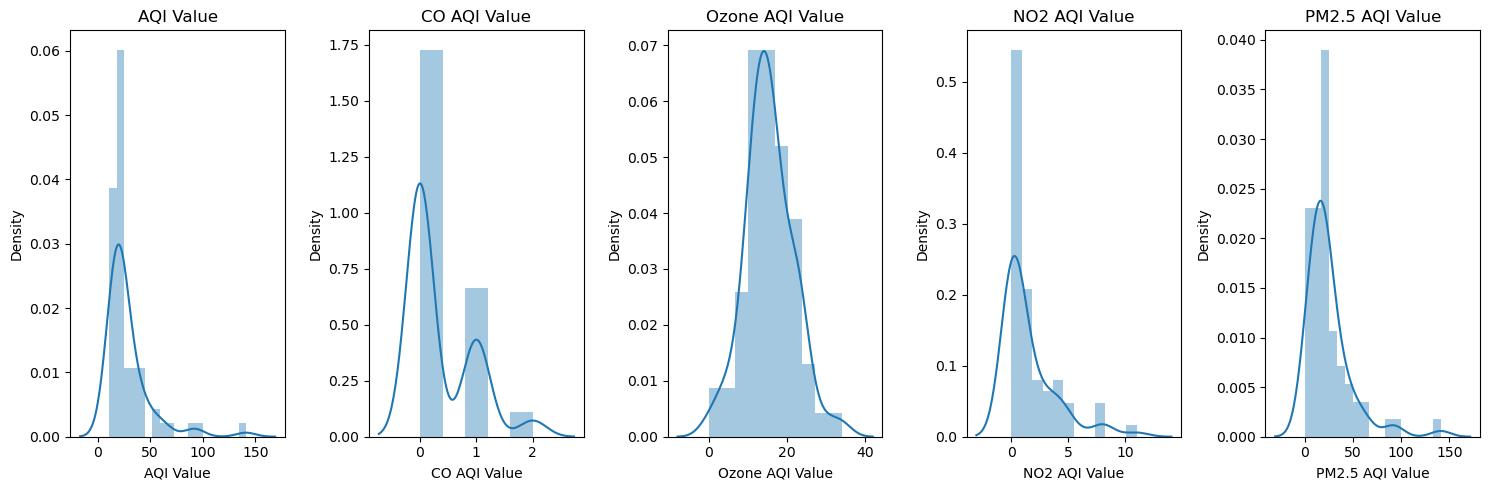

In [10]:
# Filter the DataFrame to include only data for Argentina
df_argentina = df[df['Country'] == 'Argentina']

# Display the first few rows of the filtered DataFrame
print(df_argentina.head())

# Get the number of unique cities in Argentina
num_unique_cities_argentina = df_argentina['City'].nunique()
print("Number of unique cities in Argentina:", num_unique_cities_argentina)

# Create a displot for each feature in the filtered DataFrame
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(1, 5, i + 1)
    plt.title(col[i])
    sns.distplot(df_argentina[col[i]])
    
plt.tight_layout()
plt.show()


Gráfico con línea que representa la media. 

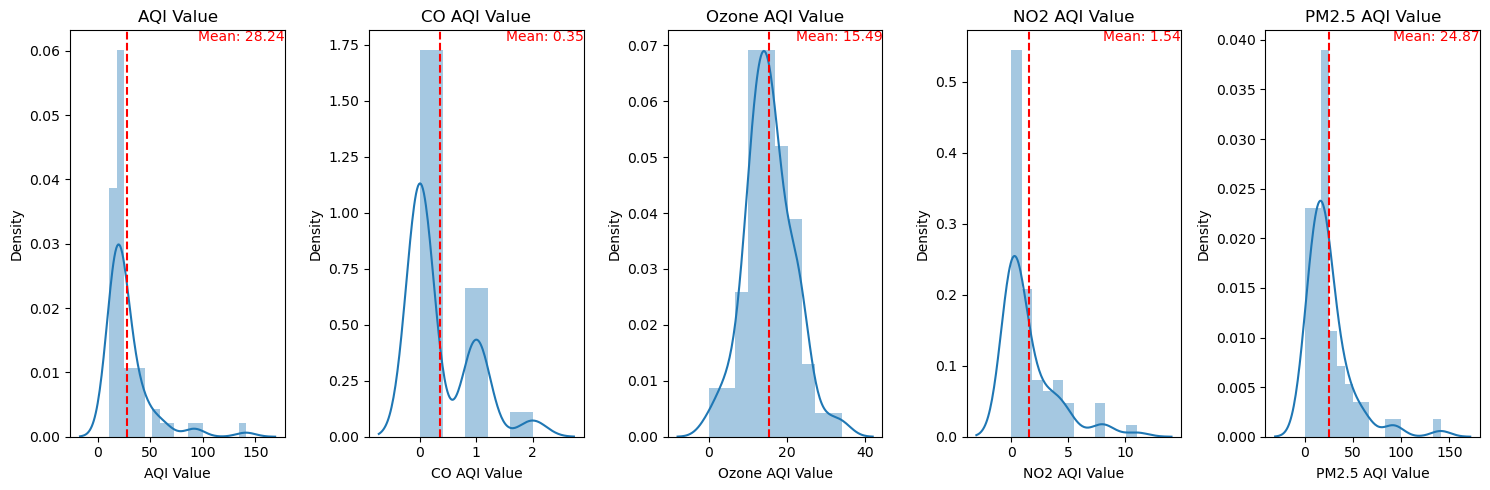

In [11]:
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 5))

for i in range(len(col)):
    plt.subplot(1, 5, i + 1)
    plt.title(col[i])
    sns.distplot(df_argentina[col[i]])
    
    # Calculate the mean of the feature
    mean_val = df_argentina[col[i]].mean()
    
    # Add a red vertical line at the mean
    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    
    # Display the mean value numerically
    plt.text(plt.xlim()[1], plt.ylim()[1], f'Mean: {mean_val:.2f}', va='top', ha='right', color='red')
    
plt.tight_layout()
plt.show()

## Gráficos de caja en función de la AQI category



Gráficos de caja referidos a Argentina. Se aprecia primacía de la condución good y moderate. 

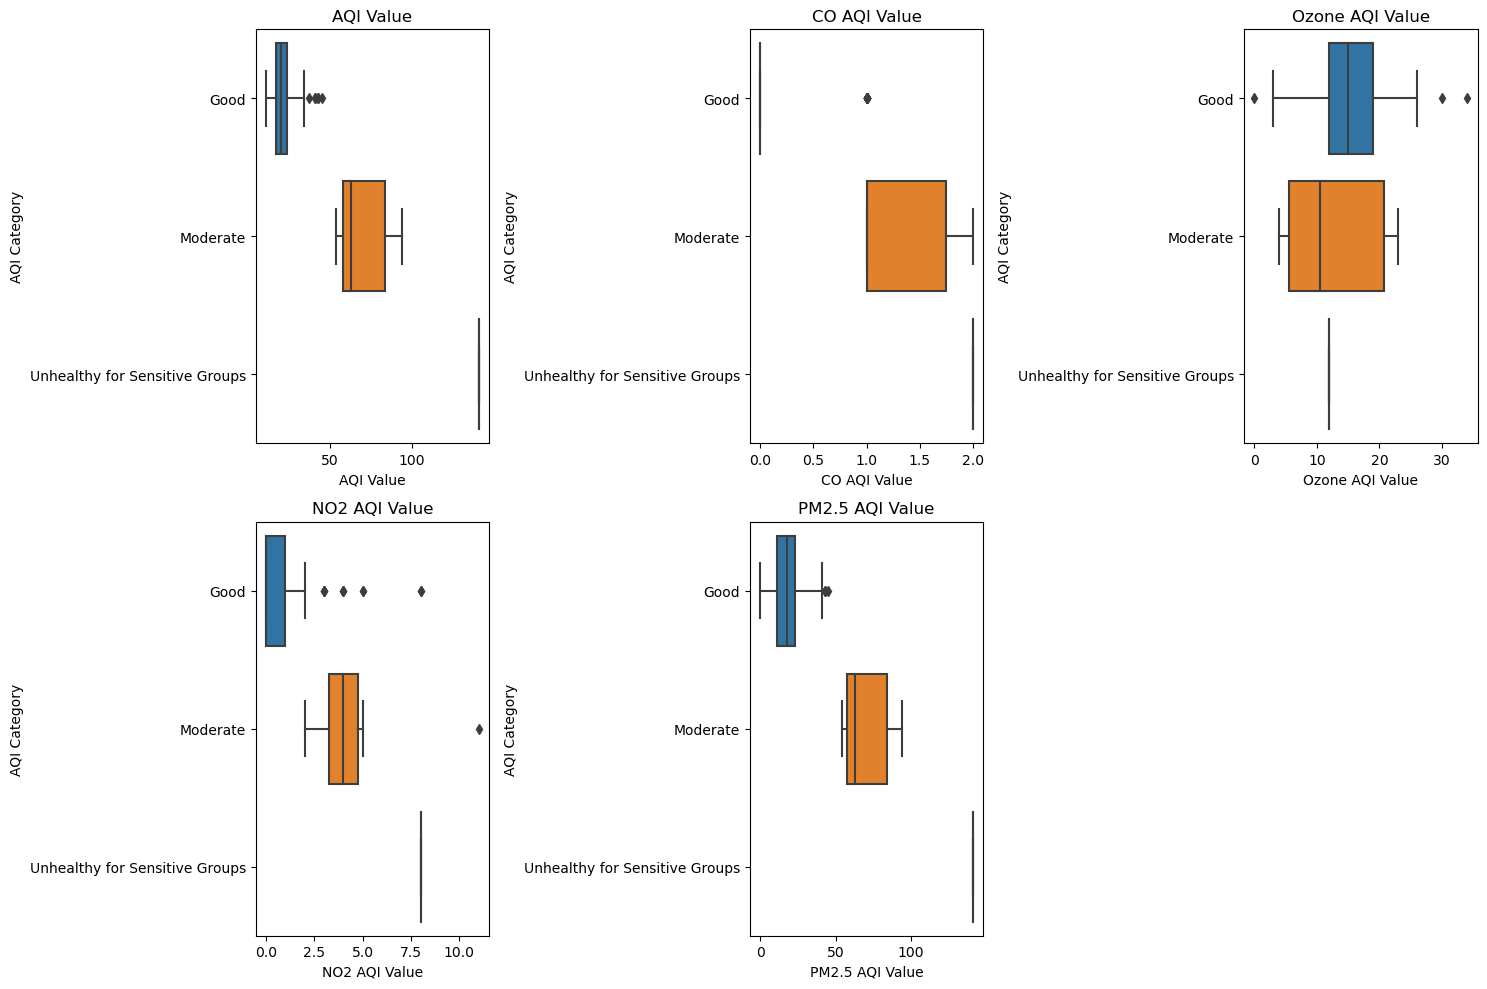

In [16]:
# Crear un gráfico de caja (boxplot) para cada característica en el DataFrame filtrado
col = ['AQI Value', 'CO AQI Value', 'Ozone AQI Value', 'NO2 AQI Value', 'PM2.5 AQI Value']
fig = plt.figure(figsize=(15, 10))

for i in range(len(col)):
    plt.subplot(2, 3, i + 1)
    plt.title(col[i])
    sns.boxplot(data=df_argentina, x=df_argentina[col[i]], y=df_argentina['AQI Category'])
    
plt.tight_layout()
plt.show()

Análisis comparativo con gráfico de cajas incluyendo todos los países de la base de datos. 

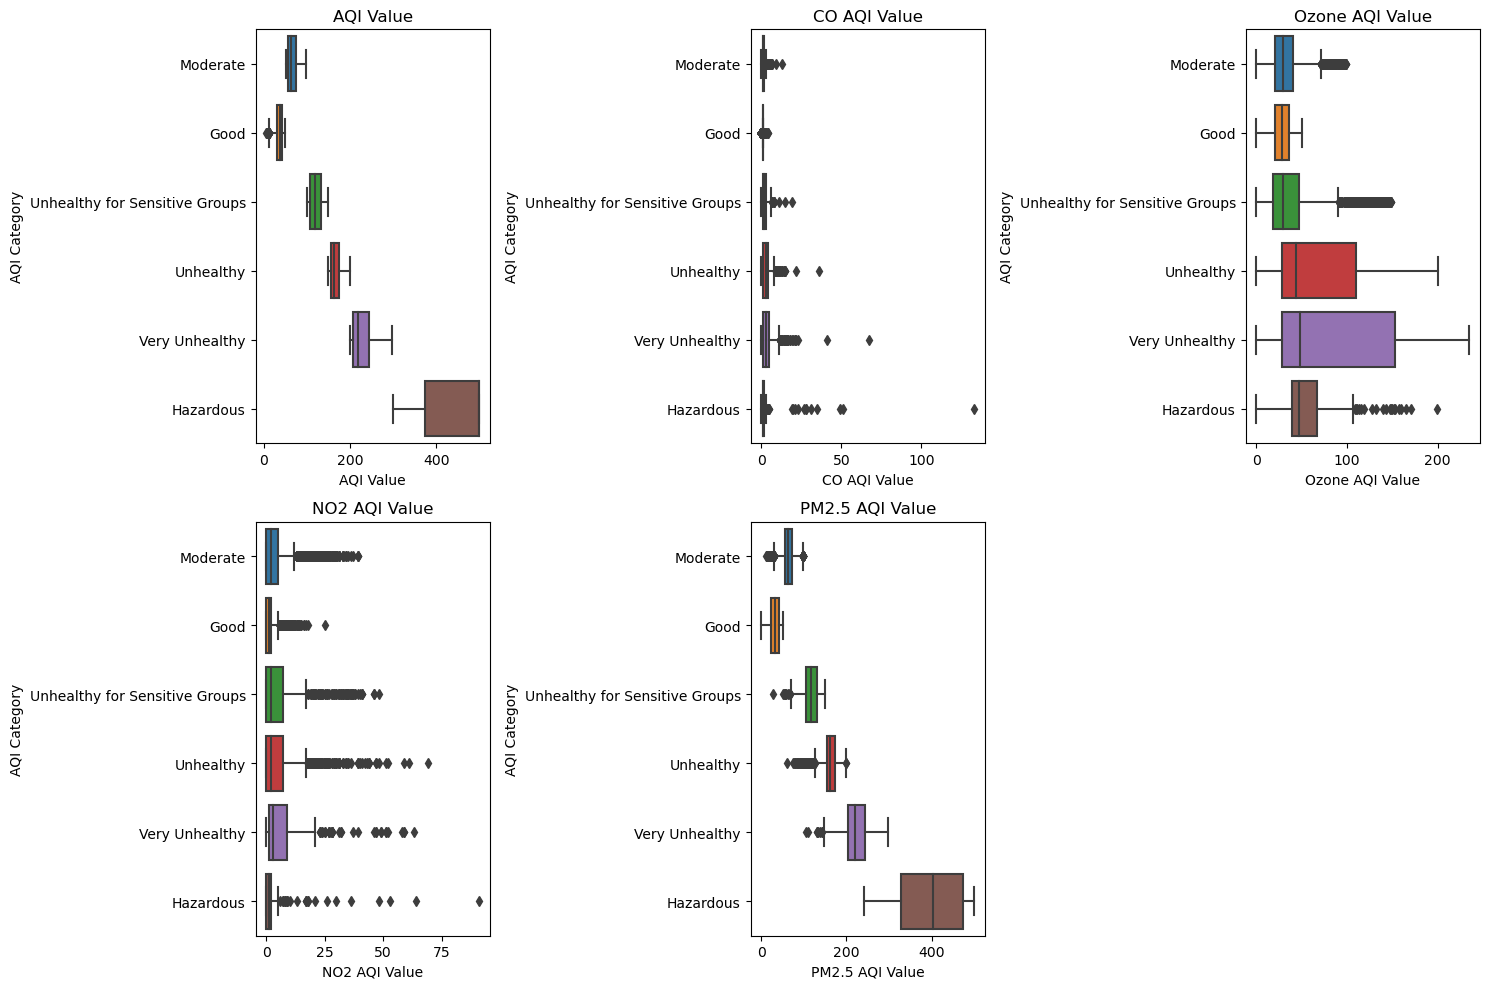

In [17]:
fig = plt.figure(figsize=(15,10))

for i in range(len(col)):
    plt.subplot(2,3,i+1)
    plt.title(col[i])
    sns.boxplot(data=df,x=df[col[i]],y=df['AQI Category'])
plt.tight_layout()
plt.show()

Gráfico de dispersión para encontrar correlaciones: 

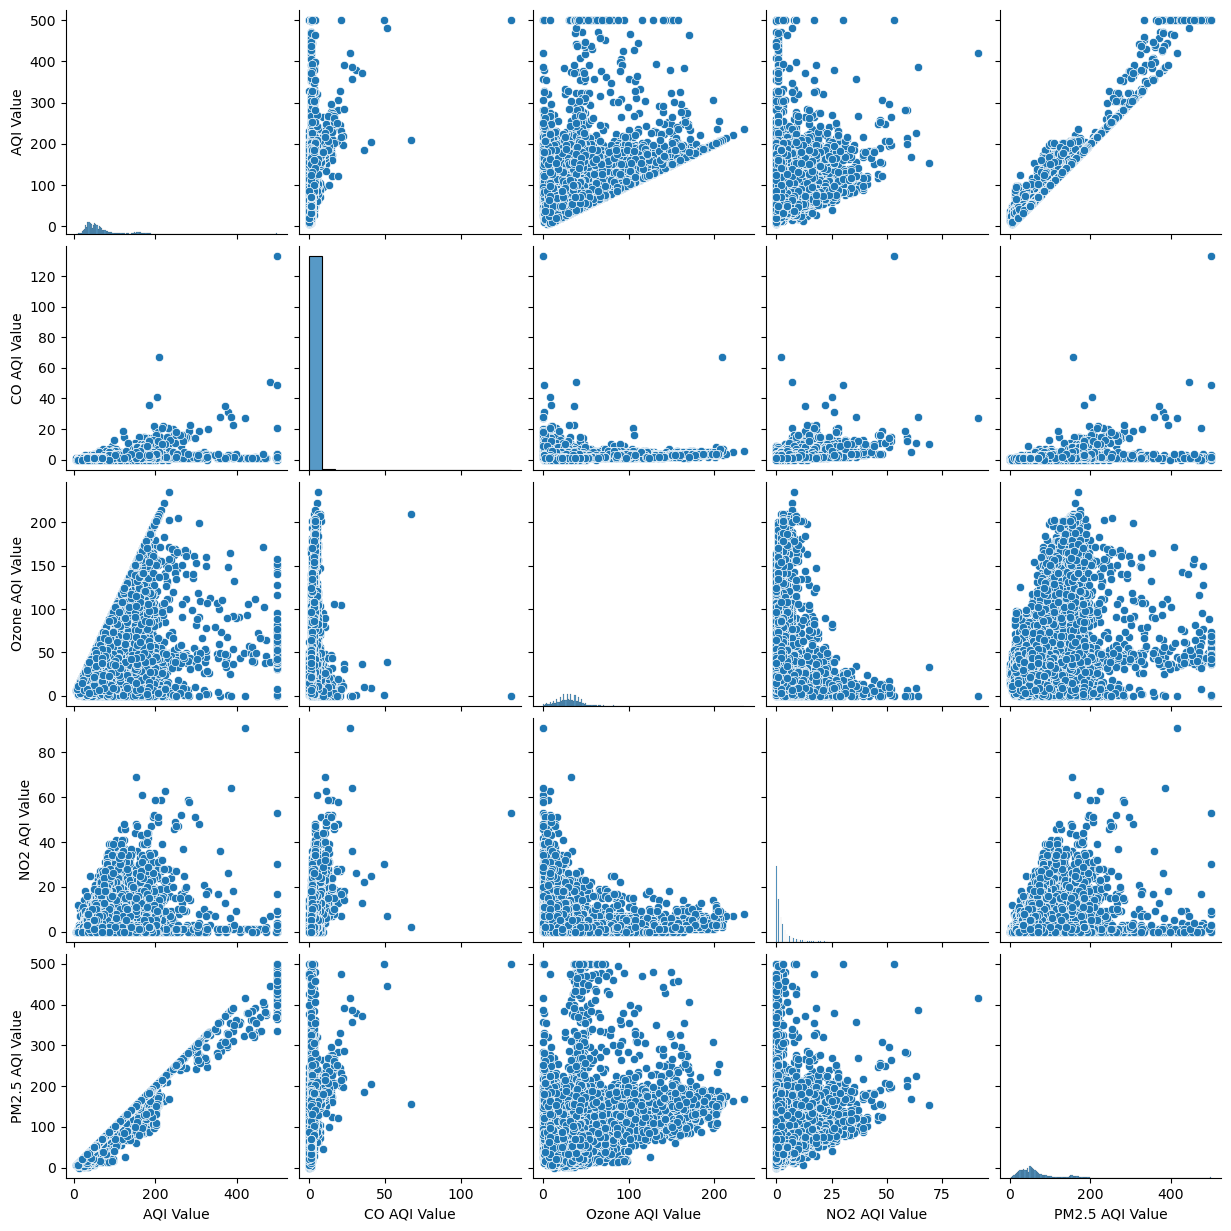

In [19]:
sns.pairplot(df)


Se evidencia la relaciń lineal entre el AQUI Value y el PM 2.5 AQI Value

Relación de estas variables en Argentina: 

In [23]:
# Crear una tabla para mostrar los valores de AQI Value y PM2.5 AQI Value por ciudad
tabla_valores = df_argentina[['City', 'AQI Value', 'PM2.5 AQI Value']].copy()

# Mostrar la tabla
print(tabla_valores)

                 City  AQI Value  PM2.5 AQI Value
297         Chacabuco         17               17
325        Corrientes         13               13
750          Mercedes         14                3
1030          Formosa         32               32
1464         Necochea         23               17
...               ...        ...              ...
21648           Lujan         22               22
21810          Tandil         23               23
22209         Campana         54               54
23339        La Rioja         11                5
23427  Nueve De Julio         20               20

[68 rows x 3 columns]


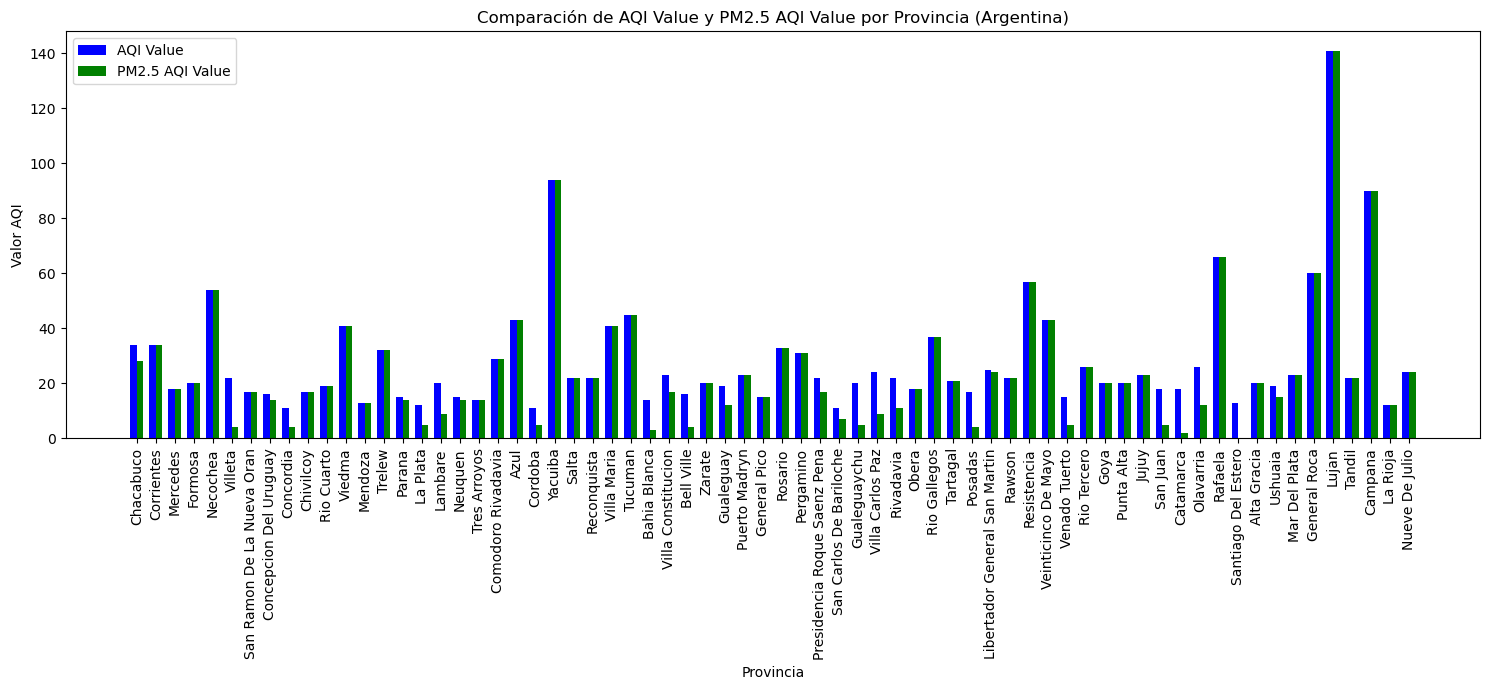

In [25]:
# Filtrar el DataFrame para incluir solo los datos de Argentina
df_argentina = df[df['Country'] == 'Argentina']

# Obtener las ciudades únicas en Argentina
ciudades = df_argentina['City'].unique()

# Configurar el ancho de las barras
ancho_barras = 0.35

# Crear un gráfico de barras para comparar AQI Value y PM2.5 AQI Value por provincia
plt.figure(figsize=(15, 7))

# Generar las posiciones de las barras para AQI Value y PM2.5 AQI Value
posiciones_aqi = np.arange(len(ciudades))
posiciones_pm25 = posiciones_aqi + ancho_barras

# Graficar las barras para AQI Value y PM2.5 AQI Value
plt.bar(posiciones_aqi, df_argentina.groupby('City')['AQI Value'].mean(), width=ancho_barras, color='b', label='AQI Value')
plt.bar(posiciones_pm25, df_argentina.groupby('City')['PM2.5 AQI Value'].mean(), width=ancho_barras, color='g', label='PM2.5 AQI Value')

plt.xlabel('Provincia')
plt.ylabel('Valor AQI')
plt.title('Comparación de AQI Value y PM2.5 AQI Value por Provincia (Argentina)')
plt.legend()
plt.xticks(posiciones_aqi + ancho_barras / 2, ciudades, rotation=90)

plt.tight_layout()
plt.show()

En este código, calculamos la diferencia absoluta entre "AQI Value" y "PM2.5 AQI Value" para cada ciudad en el DataFrame df_argentina. Luego, utilizamos un umbral (umbral_diferencia) para separar las ciudades en dos grupos: aquellas con una diferencia pequeña (primer grupo) y aquellas con una diferencia grande (segundo grupo). A continuación, creamos dos DataFrames separados para cada grupo y finalmente creamos dos gráficos de barras individuales para cada grupo, mostrando las medias de "AQI Value" y "PM2.5 AQI Value" para las ciudades en cada grupo.

Esto te permitirá visualizar dos gráficos separados, uno para las ciudades con valores casi idénticos y otro para las ciudades con diferencias significativas en las variables "AQI Value" y "PM2.5 AQI Value".

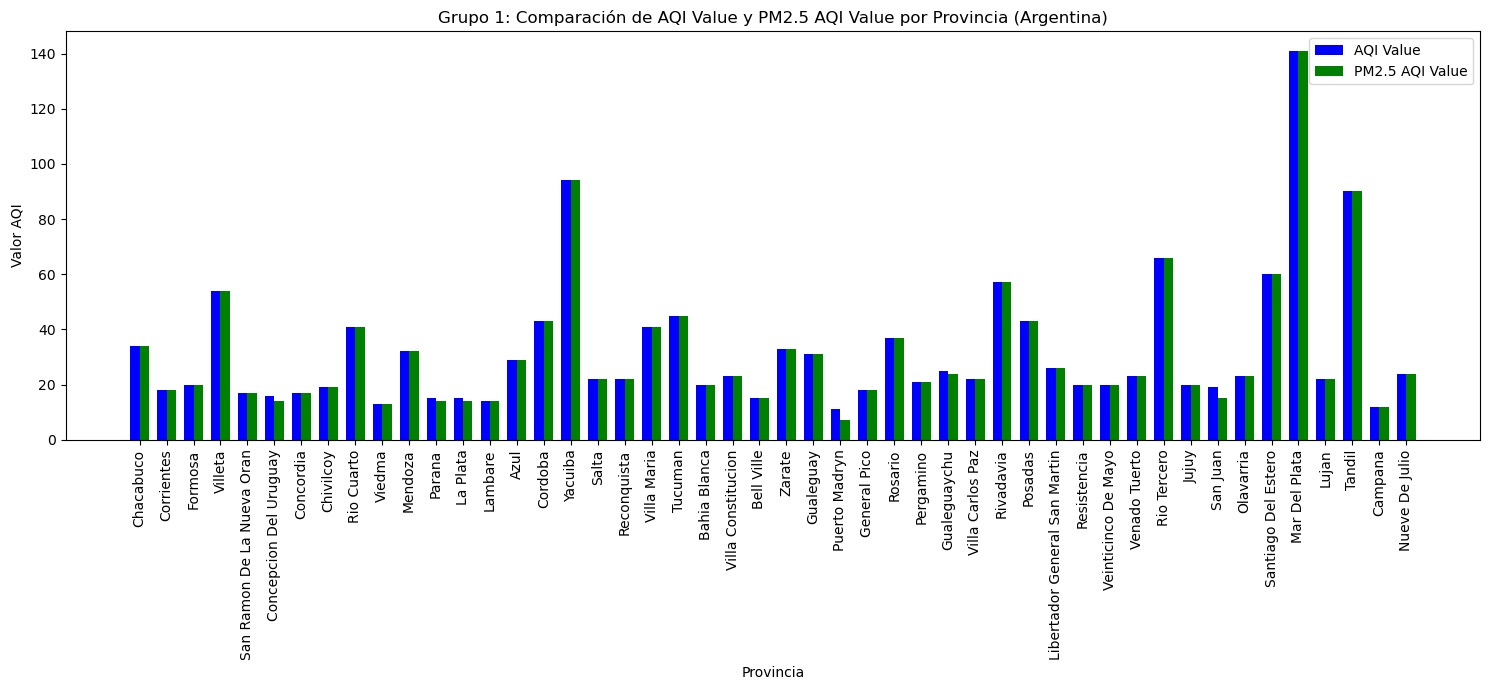

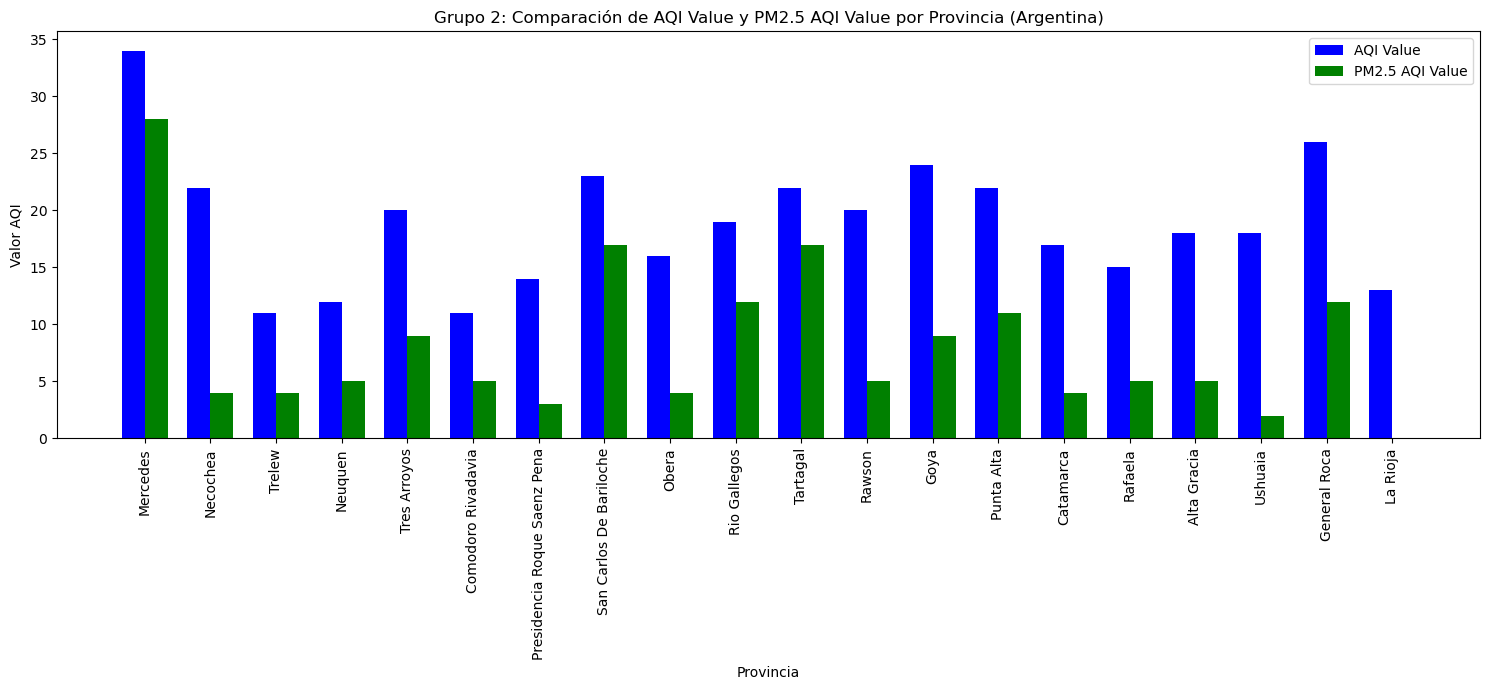

In [32]:
# Filtrar el DataFrame para incluir solo los datos de Argentina
df_argentina = df[df['Country'] == 'Argentina']

# Calcular la diferencia absoluta entre AQI Value y PM2.5 AQI Value para cada ciudad
df_argentina['Diferencia'] = np.abs(df_argentina['AQI Value'] - df_argentina['PM2.5 AQI Value'])

# Definir el umbral para separar las ciudades en dos grupos
umbral_diferencia = 5  # Puedes ajustar este valor según tus criterios

# Obtener las ciudades en el primer grupo (diferencia pequeña)
ciudades_grupo1 = df_argentina[df_argentina['Diferencia'] < umbral_diferencia]['City'].unique()

# Obtener las ciudades en el segundo grupo (diferencia grande)
ciudades_grupo2 = df_argentina[df_argentina['Diferencia'] >= umbral_diferencia]['City'].unique()

# Crear dos DataFrames separados para cada grupo
df_grupo1 = df_argentina[df_argentina['City'].isin(ciudades_grupo1)]
df_grupo2 = df_argentina[df_argentina['City'].isin(ciudades_grupo2)]

# Configurar el ancho de las barras
ancho_barras = 0.35

# Crear el primer gráfico para ciudades en el primer grupo
plt.figure(figsize=(15, 7))

posiciones_aqi_grupo1 = np.arange(len(ciudades_grupo1))
posiciones_pm25_grupo1 = posiciones_aqi_grupo1 + ancho_barras

plt.bar(posiciones_aqi_grupo1, df_grupo1.groupby('City')['AQI Value'].mean(), width=ancho_barras, color='b', label='AQI Value')
plt.bar(posiciones_pm25_grupo1, df_grupo1.groupby('City')['PM2.5 AQI Value'].mean(), width=ancho_barras, color='g', label='PM2.5 AQI Value')

plt.xlabel('Provincia')
plt.ylabel('Valor AQI')
plt.title('Grupo 1: Comparación de AQI Value y PM2.5 AQI Value por Provincia (Argentina)')
plt.legend()
plt.xticks(posiciones_aqi_grupo1 + ancho_barras / 2, ciudades_grupo1, rotation=90)

plt.tight_layout()
plt.show()

# Crear el segundo gráfico para ciudades en el segundo grupo
plt.figure(figsize=(15, 7))

posiciones_aqi_grupo2 = np.arange(len(ciudades_grupo2))
posiciones_pm25_grupo2 = posiciones_aqi_grupo2 + ancho_barras

plt.bar(posiciones_aqi_grupo2, df_grupo2.groupby('City')['AQI Value'].mean(), width=ancho_barras, color='b', label='AQI Value')
plt.bar(posiciones_pm25_grupo2, df_grupo2.groupby('City')['PM2.5 AQI Value'].mean(), width=ancho_barras, color='g', label='PM2.5 AQI Value')

plt.xlabel('Provincia')
plt.ylabel('Valor AQI')
plt.title('Grupo 2: Comparación de AQI Value y PM2.5 AQI Value por Provincia (Argentina)')
plt.legend()
plt.xticks(posiciones_aqi_grupo2 + ancho_barras / 2, ciudades_grupo2, rotation=90)

plt.tight_layout()
plt.show()